<a href="https://colab.research.google.com/github/AbdullahEmadeldeen/Machine-Learning/blob/main/ibm_deeplearning_keras_training1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd , numpy as np , matplotlib.pyplot as plt , seaborn as sns

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [63]:
from tensorflow.keras.datasets import mnist


In [64]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [65]:
# Flatten the images and combine train and test data
x_combined = np.concatenate((x_train.reshape(x_train.shape[0], -1), x_test.reshape(x_test.shape[0], -1)))
y_combined = np.concatenate((y_train, y_test))

# Create a DataFrame
# Column names for image data will be 'pixel_0', 'pixel_1', ..., 'pixel_783'
image_columns = [f'pixel_{i}' for i in range(x_combined.shape[1])]
df = pd.DataFrame(x_combined, columns=image_columns)

# Add the label column
df['label'] = y_combined

display(df.head())
display(df.info())

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel_0 to label
dtypes: uint8(785)
memory usage: 52.4 MB


None

# Task
Read the MNIST dataset from "mnist_train.csv" and "mnist_test.csv" into separate dataframes, combine them into a single dataframe, and then scale the pixel data, split the data into training and testing sets, and visualize a sample image.

## Scale the pixel data

### Subtask:
Scale the pixel values in the DataFrame to a range between 0 and 1.


**Reasoning**:
Scale the pixel values by dividing by 255 to normalize them between 0 and 1, and update the DataFrame.



In [66]:
pixel_columns = df.columns.difference(['label'])
df[pixel_columns] = df[pixel_columns] / 255.0
display(df.head())

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


## Split the data

### Subtask:
Split the DataFrame into training and testing sets.


**Reasoning**:
Separate features and target, then split the data into training and testing sets using train_test_split with specified parameters.



In [93]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
68681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
46730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,label
68681,0
19961,4
11040,4
27673,2
22876,7


,label
46730,8
48393,4
41416,8
34506,7
43725,7


## Visualize a sample

### Subtask:
Select and display a sample image from the DataFrame.


**Reasoning**:
Select a sample image from the DataFrame, extract its pixel values, reshape them into a 28x28 array, and display the image with its label as the title.



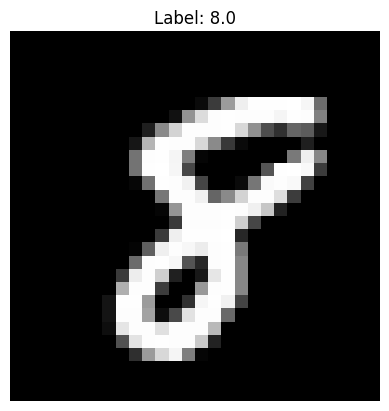

In [94]:
sample_index = 777
sample_image_data = df.iloc[sample_index]
sample_image_pixels = sample_image_data.drop('label').values
sample_image_reshaped = sample_image_pixels.reshape(28, 28)
sample_image_label = sample_image_data['label']

plt.imshow(sample_image_reshaped, cmap='gray')
plt.title(f'Label: {sample_image_label}')
plt.axis('off')
plt.show()

In [69]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {}'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

## Summary:

### Data Analysis Key Findings

*   The pixel data was successfully scaled to a range between 0 and 1 by dividing by 255.0.
*   The combined dataset containing both training and testing data was split into separate training and testing sets with a test size of 20%.
*   A sample image from the scaled data was successfully visualized, showing the grayscale representation of the digit and its corresponding label.

### Insights or Next Steps

*   The data is now preprocessed and ready for training a machine learning model for digit classification.
*   Further steps would involve selecting an appropriate model, training it on the `X_train` and `y_train` data, and evaluating its performance on the `X_test` and `y_test` data.


making a  sequential model
1- flatten layer >> to convert 28*28 image to 784  
2- dense ,  ,                dkaam am, sn cs

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam , SGD , RMSprop
from tensorflow.keras.losses import sparse_categorical_crossentropy , binary_crossentropy , categorical_crossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.callbacks import EarlyStopping

In [96]:
model_1 = Sequential(
    [
    # Flatten(input_shape=(28, 28)),
    Dense(265, activation="relu"),
    Dense(10, activation='softmax')
        ]
)
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

test_1 = model_1.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8942 - loss: 0.3558 - val_accuracy: 0.9671 - val_loss: 0.1139
Epoch 2/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.9722 - loss: 0.0910 - val_accuracy: 0.9651 - val_loss: 0.1149
Epoch 3/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.9822 - loss: 0.0559 - val_accuracy: 0.9719 - val_loss: 0.0962
Epoch 4/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.9872 - loss: 0.0407 - val_accuracy: 0.9747 - val_loss: 0.0909
Epoch 5/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9898 - loss: 0.0300 - val_accuracy: 0.9728 - val_loss: 0.0987
Epoch 6/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.9933 - loss: 0.0212 - val_accuracy: 0.9758 - val_loss: 0.0903
Epoch 7/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.9942 - loss: 0.0181 - val_accuracy: 0.9762 - val_loss: 0.0962
Epoch 8/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.9958 - loss: 0

In [97]:
model_1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 265)            │       208,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         2,660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 632,057 (2.41 MB)

 Trainable params: 210,685 (822.99 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 421,372 (1.61 MB)

In [98]:
model_1.evaluate(X_test, y_test)

657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9756 - loss: 0.1125


[0.11456752568483353, 0.9763333201408386]

In [99]:
model_1.get_metrics_result()


{'accuracy': 0.9763333201408386, 'loss': 0.11456752568483353}

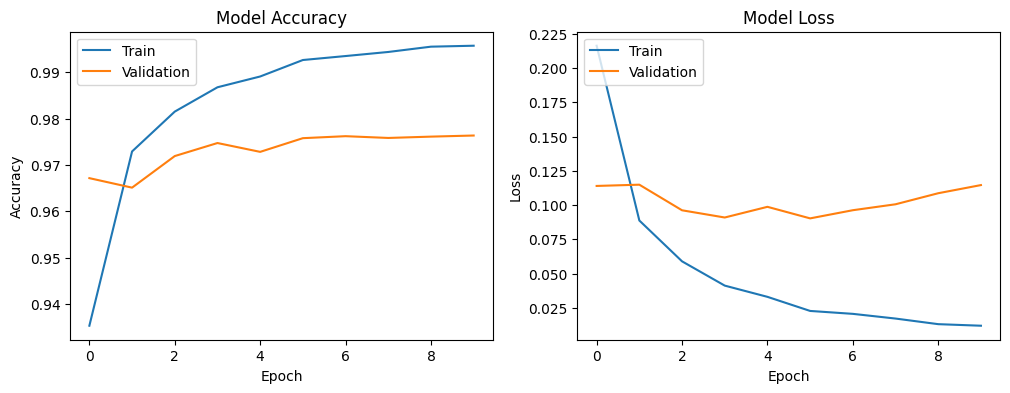

In [100]:
# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(test_1.history['accuracy'])
plt.plot(test_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(test_1.history['loss'])
plt.plot(test_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

the results of the first model was bad due to overfitting so i will adjust some
**parameters**

In [102]:
model_2 = Sequential(
    [
    # Flatten(input_shape=(28, 28)),
    Dense(265, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation='softmax')
        ]
)
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

test_2 = model_2.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.8866 - loss: 0.3658 - val_accuracy: 0.9658 - val_loss: 0.1113
Epoch 2/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - accuracy: 0.9693 - loss: 0.0969 - val_accuracy: 0.9670 - val_loss: 0.1134
Epoch 3/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9791 - loss: 0.0697 - val_accuracy: 0.9728 - val_loss: 0.0934
Epoch 4/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.9849 - loss: 0.0468 - val_accuracy: 0.9761 - val_loss: 0.0856
Epoch 5/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.9866 - loss: 0.0408 - val_accuracy: 0.9722 - val_loss: 0.1046
Epoch 6/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.9896 - loss: 0.0338 - val_accuracy: 0.9726 - val_loss: 0.1131
Epoch 7/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.9907 - loss: 0.0316 - val_accuracy: 0.9728 - val_loss: 0.1110
Epoch 8/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.9910 - loss: 0

In [103]:
model_2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 265)            │       208,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        34,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 752,939 (2.87 MB)

 Trainable params: 250,979 (980.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 501,960 (1.91 MB)

In [104]:
model_2.evaluate(X_test, y_test)

657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9775 - loss: 0.1105


[0.11436150223016739, 0.9781428575515747]

In [106]:
model_2.get_metrics_result()

{'accuracy': 0.9781428575515747, 'loss': 0.11436150223016739}

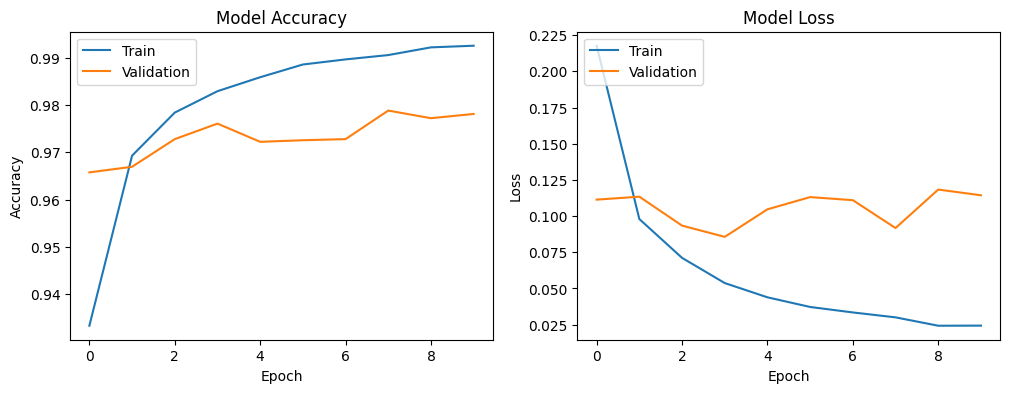

In [107]:
# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(test_2.history['accuracy'])
plt.plot(test_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(test_2.history['loss'])
plt.plot(test_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# . Add Dropout
# Reduce overfitting by adding dropout layers between Dense layers:

In [108]:
from tensorflow.keras.layers import Flatten, Dense, Dropout

model_3 = Sequential([
    Dense(265, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

test_3 = model_3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

model_3.get_metrics_result()

Epoch 1/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7780 - loss: 0.6927 - val_accuracy: 0.9552 - val_loss: 0.1535
Epoch 2/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9428 - loss: 0.2027 - val_accuracy: 0.9586 - val_loss: 0.1425
Epoch 3/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9555 - loss: 0.1558 - val_accuracy: 0.9684 - val_loss: 0.1087
Epoch 4/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9623 - loss: 0.1273 - val_accuracy: 0.9711 - val_loss: 0.0992
Epoch 5/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9671 - loss: 0.1104 - val_accuracy: 0.9722 - val_loss: 0.0952
Epoch 6/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9713 - loss: 0.1024 - val_accuracy: 0.9767 - val_loss: 0.0870
Epoch 7/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.9744 - loss: 0.0883 - val_accuracy: 0.9744 - val_loss: 0.0914
Epoch 8/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9769 - loss

{'accuracy': 0.9768095016479492, 'loss': 0.09973173588514328}

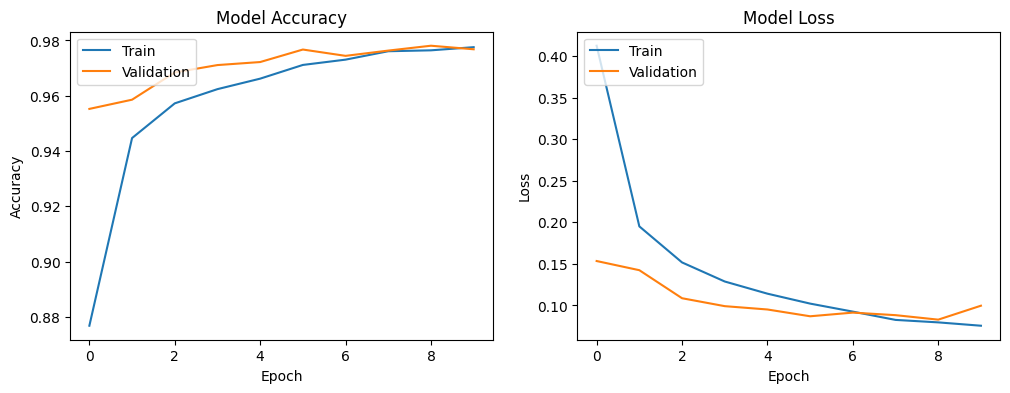

In [109]:
# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(test_3.history['accuracy'])
plt.plot(test_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(test_3.history['loss'])
plt.plot(test_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [110]:
test_loss, test_acc = model_3.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9768 - loss: 0.1003
Test accuracy: 0.9768


657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


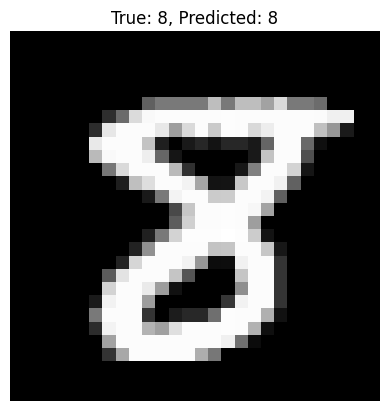

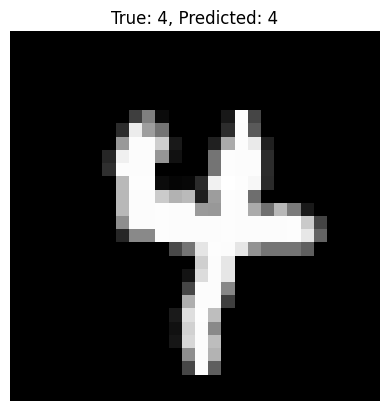

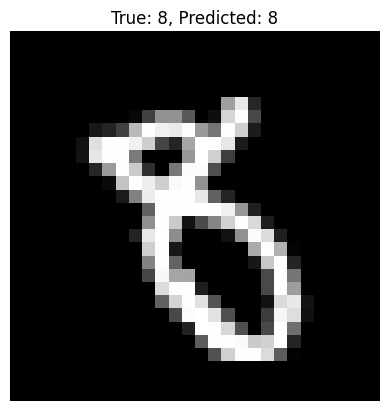

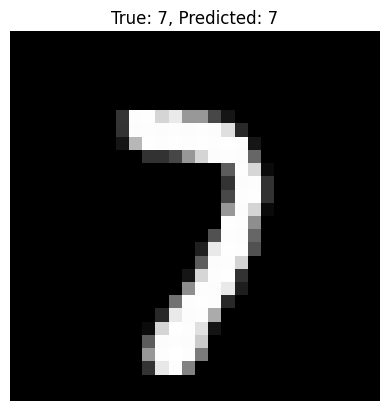

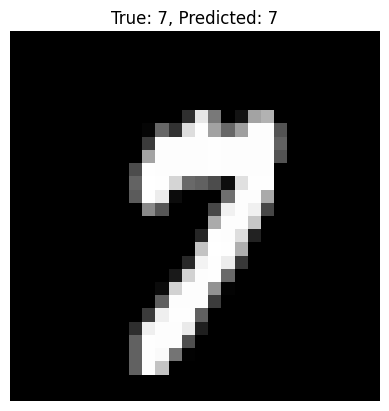

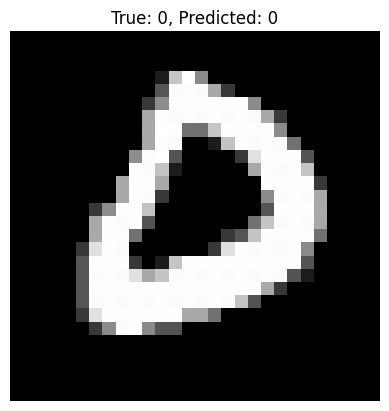

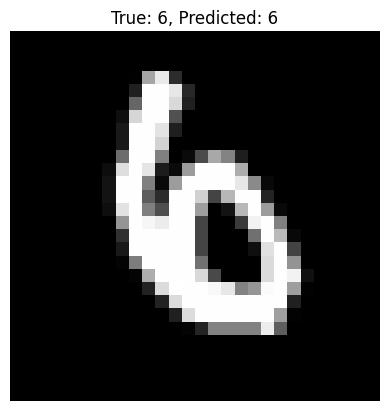

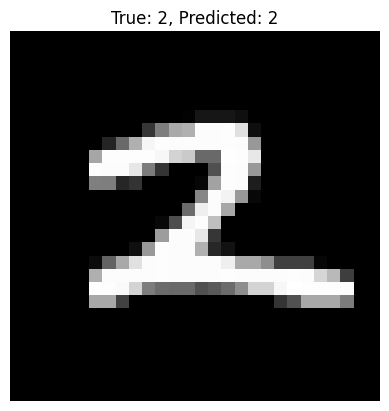

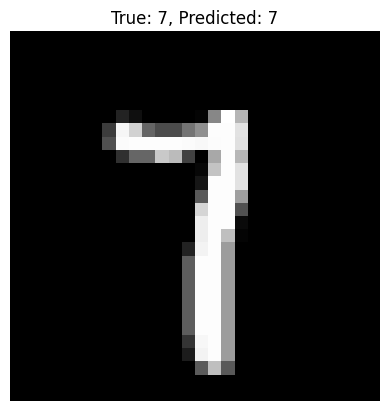

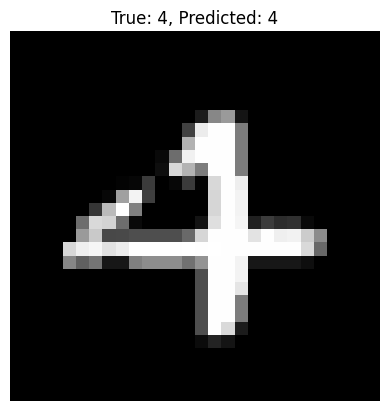

In [114]:
import matplotlib.pyplot as plt
import numpy as np

preds = model_3.predict(X_test)
pred_labels = np.argmax(preds, axis=1)

for i in range(10):
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test.iloc[i]}, Predicted: {pred_labels[i]}")
    plt.axis('off')
    plt.show()

## Evaluate the model with a Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.

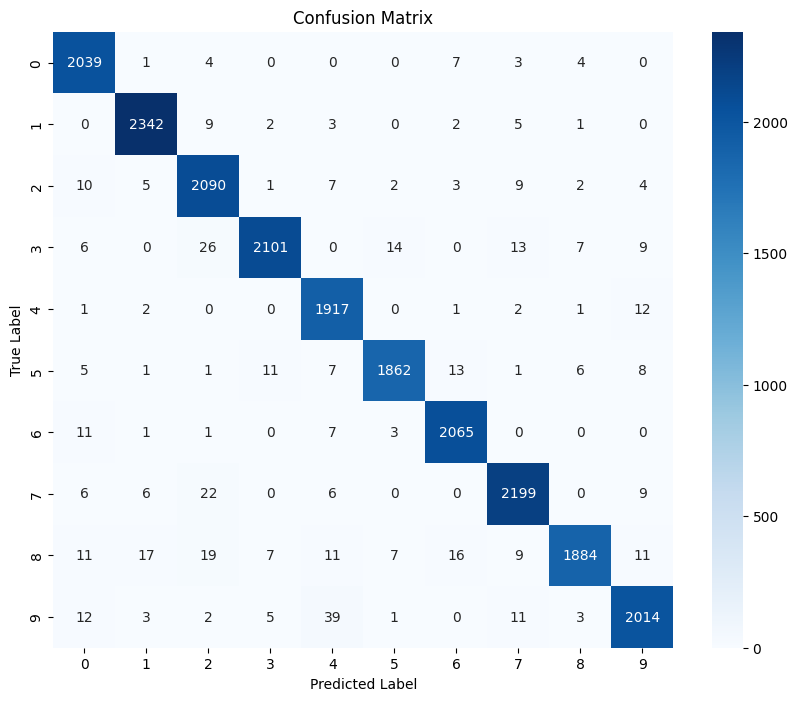

In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()